## Image-to-Image Translation with CycleGAN (PyTorch)

This repository provides a clean and practical implementation of **CycleGAN-based image-to-image translation**, built directly on top of the well-established [pytorch-CycleGAN-and-pix2pix](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) codebase. Instead of re-implementing core components, the project focuses on **reproducibility, clarity, and structured experimentation** using pretrained models and standard datasets.

The workflow supports unpaired image translation tasks such as:
- **horse ↔ zebra**
- **Van Gogh paintings ↔ real photos**

Both datasets and pretrained weights are reused from the original implementation to ensure consistency with published results while enabling rapid experimentation, visualization, and extension.

### Available Resources
- **Datasets**: `horse2zebra`, `vangogh2photo`
- **Pretrained Models**: `horse2zebra`, `zebra2horse`, `style_vangogh`

This repository is intended as a lightweight, research-friendly setup for understanding CycleGAN behavior, running inference, and visualizing translation cycles (A → B → A) without modifying the underlying architecture.


### 📦 Datasets Used

The experiments rely on standard CycleGAN datasets commonly distributed with the original project:

- **`horse2zebra`**: Two unpaired domains containing horse images (domain A) and zebra images (domain B). The model learns to translate between these domains without requiring aligned pairs.
- **`vangogh2photo`**: Unpaired domains of Van Gogh-style artwork (domain A) and real-world photographs (domain B), used for artistic style transfer and domain translation.

Each dataset typically follows the folder structure:
`trainA/`, `trainB/`, `testA/`, and `testB/`, enabling training and evaluation for both translation directions.


### 📥 Downloading and Preparing the Dataset

Sets the working directory, defines the target CycleGAN dataset (`vangogh2photo`), and downloads it directly from the official Berkeley CycleGAN repository. The dataset is extracted into a local datasets directory and the compressed archive is removed afterward to save disk space. This prepares the standard folder structure required by the CycleGAN training and inference pipelines.

In [ ]:
import os
WORK_DIR = "./workdir"
os.chdir(WORK_DIR)

DATA="vangogh2photo"
URL = f"http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/{DATA}.zip"
ZIP_FILE = f"{WORK_DIR}/cycle_gan/datasets/{DATA}.zip"
TARGET_DIR = f"{WORK_DIR}/cycle_gan/datasets/{DATA}"

!mkdir -p {WORK_DIR}/datasets
!wget -N {URL} -O {ZIP_FILE}
!unzip {ZIP_FILE} -d {WORK_DIR}/datasets/
!rm {ZIP_FILE}

### 🧠 Downloading a Pretrained CycleGAN Generator

Defines the name of a pretrained CycleGAN model (`style_vangogh`) and downloads the corresponding generator checkpoint from the official CycleGAN model repository. The checkpoint is saved into a dedicated `checkpoints` directory following the expected CycleGAN folder structure, enabling immediate use for inference

In [ ]:
CHKPT_NAME = "style_vangogh"
MODEL_DIR = f"{WORK_DIR}/checkpoints/{CHKPT_NAME}_pretrained/latest_net_G.pth"
URL = f"http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/{CHKPT_NAME}.pth"

!mkdir -p {WORK_DIR}/checkpoints/{CHKPT_NAME}_pretrained
!wget -N {URL} -O {MODEL_DIR}

### 🖼️ Visualizing Results from a Pretrained CycleGAN

Selects a random subset of test images and visualizes the output of a pretrained CycleGAN model. For each sampled image, the function displays the original input image (from the source domain) alongside its translated counterpart generated by the CycleGAN generator. This side-by-side layout provides a clear qualitative assessment of how well the pretrained model captures and transfers visual characteristics between the two domains.

In [6]:
import matplotlib.pyplot as plt
import random

def test_and_plot_pretrained_cycle_gan(DATA_ROOT, OUTPUT_DIR, NAME, DATA_NAME, TEST_NAME):
    images_list = sorted(os.listdir(os.path.join(DATA_ROOT, TEST_NAME)))
    indices = random.sample(range(len(images_list)), 8)

    fig, axes = plt.subplots(2, len(indices), figsize=(2.5 * len(indices), 5))
    for col, idx in enumerate(indices):
        image_name = os.path.splitext(images_list[idx])[0]
        img_real = plt.imread(os.path.join(OUTPUT_DIR, NAME, "test_latest", "images", f"{image_name}_real.png"))
        img_fake = plt.imread(os.path.join(OUTPUT_DIR, NAME, "test_latest", "images", f"{image_name}_fake.png"))

        axes[0, col].imshow(img_real)
        axes[0, col].set_title(f"Real-{DATA_NAME.split('2')[0].upper()} ({idx})", fontsize=12)
        axes[0, col].axis("off")

        axes[1, col].imshow(img_fake)
        axes[1, col].set_title(f"Fake-{DATA_NAME.split('2')[1].upper()} ({idx})", fontsize=12)
        axes[1, col].axis("off")

    axes[0, 0].set_ylabel("Real", fontsize=14)
    axes[1, 0].set_ylabel("Fake", fontsize=14)

    plt.tight_layout()
    plt.show()

### 🚀 Running Inference with a Pretrained CycleGAN Model

Configures paths and runtime parameters to run CycleGAN inference using a pretrained model on the selected test split (`testA`). The `test.py` script is executed in inference mode, loading the pretrained generator and translating all available test images from the source domain to the target domain. Results are saved to the specified output directory following the standard CycleGAN results structure, enabling downstream visualization and analysis.

```
WORK_DIR = "./workdir"
DATA_NAME = "horse2zebra"
DATA_ROOT = f"{WORK_DIR}/datasets/{DATA_NAME}"
CHKPTS_DIR = f"{WORK_DIR}/checkpoints"
OUTPUT_DIR = f"{WORK_DIR}/outputs"
MODEL = "test"
NAME = "horse2zebra_pretrained" 
TEST_NAME = "testA"
NUM_TEST = len(sorted(os.listdir(os.path.join(DATA_ROOT, TEST_NAME))))

python test.py --dataroot {DATA_ROOT}/{TEST_NAME} --checkpoints_dir {CHKPTS_DIR} --results_dir {OUTPUT_DIR} --name {NAME} --model {MODEL} --num_test {NUM_TEST} --no_dropout

```

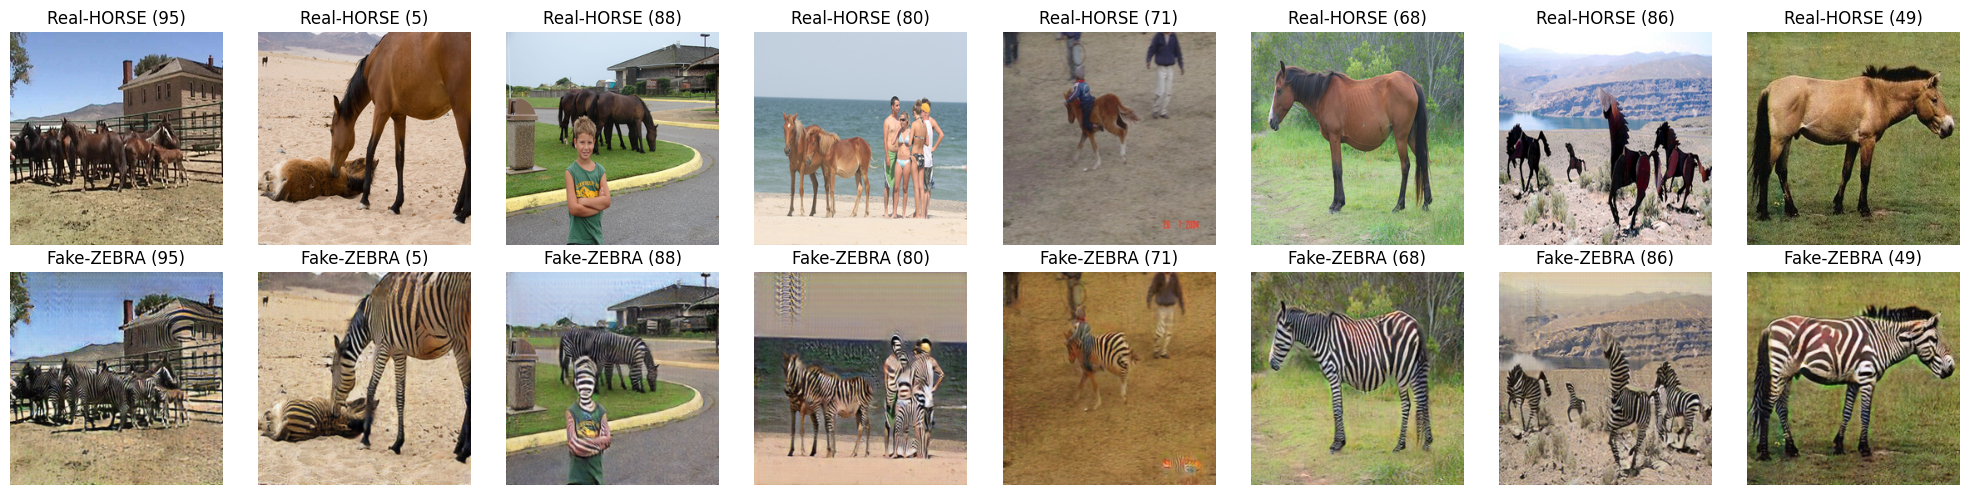

In [9]:
WORK_DIR = "./workdir"
DATA_NAME = "horse2zebra"
DATA_ROOT = f"{WORK_DIR}/datasets/{DATA_NAME}"
OUTPUT_DIR = f"{WORK_DIR}/outputs"
NAME = "horse2zebra_pretrained" 
TEST_NAME = "testA"

test_and_plot_pretrained_cycle_gan(DATA_ROOT, OUTPUT_DIR, NAME, DATA_NAME, TEST_NAME)

```
WORK_DIR = "./workdir"
DATA_NAME = "photo2vangogh" 
DATA_ROOT = f"{WORK_DIR}/datasets/{DATA_NAME}"
CHKPTS_DIR = f"{WORK_DIR}/checkpoints"
OUTPUT_DIR = f"{WORK_DIR}/outputs"
MODEL = "test"
NAME = "style_vangogh_pretrained" 
TEST_NAME = "testB"
NUM_TEST = len(sorted(os.listdir(os.path.join(DATA_ROOT, TEST_NAME))))

python test.py --dataroot {DATA_ROOT}/{TEST_NAME} --checkpoints_dir {CHKPTS_DIR} --results_dir {OUTPUT_DIR} --name {NAME} --model {MODEL} --num_test {NUM_TEST} --no_dropout

```

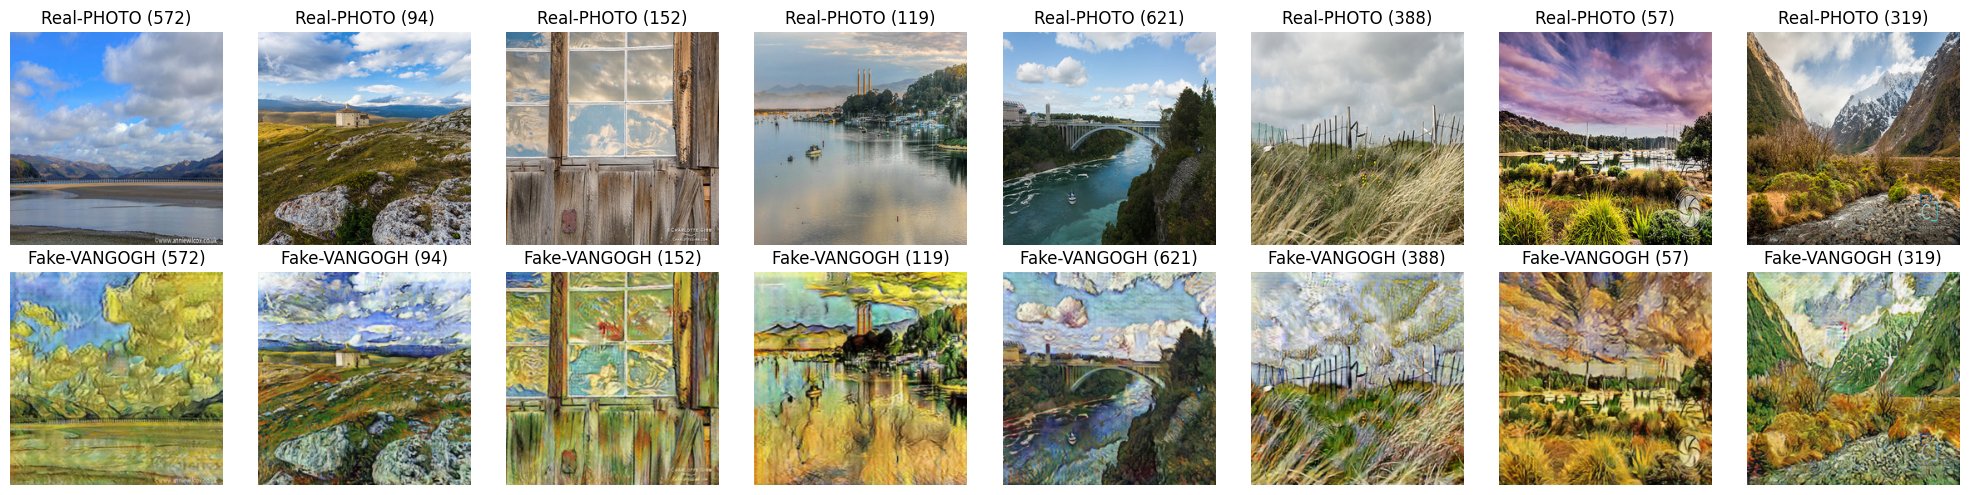

In [11]:
WORK_DIR = "./workdir"
DATA_NAME = "photo2vangogh" 
DATA_ROOT = f"{WORK_DIR}/datasets/{DATA_NAME}"
OUTPUT_DIR = f"{WORK_DIR}/outputs"
NAME = "style_vangogh_pretrained" 
TEST_NAME = "testB"

test_and_plot_pretrained_cycle_gan(DATA_ROOT, OUTPUT_DIR, NAME, DATA_NAME, TEST_NAME)

---
© Ashkan M., NTNU  
Released under the MIT License
---